<a href="https://colab.research.google.com/github/mochammadfarkhan/rusantara/blob/machine-learning/Rusantara_TransferLearning_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengimport library yang dipakai

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import pathlib
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Memuat Dataset

In [51]:
train_data_dir = "/content/gdrive/MyDrive/rusantara/rusantara2"

BATCH_SIZE = 32
IMG_SIZE = (320, 320)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # set validation split

# training dataset 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training') # set as training data

# validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1448 images belonging to 6 classes.
Found 359 images belonging to 6 classes.


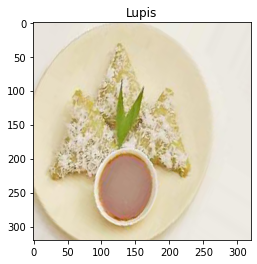

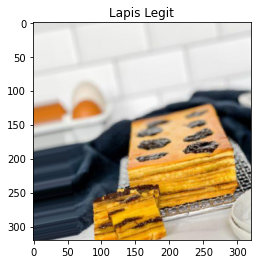

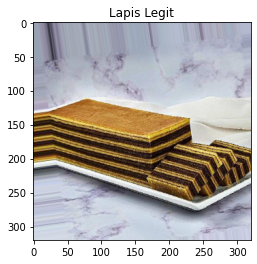

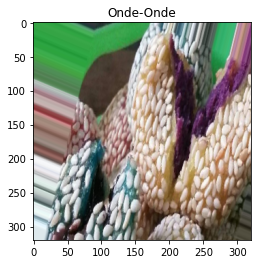

In [53]:
class_names = ["Dadar Gulung", "Kue Lemper", "Lapis Legit", "Lupis", "Onde-Onde", "Serabi"]

x,y = train_generator.next()
for i in range(4):
    image = x[i]
    label = y[i]
    # plt.title(class_names[int(label)])
    plt.title(class_names[int(label)])
    plt.imshow(image)
    plt.show()

# menggunakan model transfer learning

In [54]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [55]:
pretrained_model = InceptionV3(input_shape = (320, 320, 3),
                                include_top = False,
                                weights = 'imagenet')

In [56]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [57]:
last_layer = pretrained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 18, 18, 768)


In [58]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)                  
x = tf.keras.layers.Dense(6, activation='softmax')(x)

In [59]:
model2 = tf.keras.Model(pretrained_model.input, x)
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 159, 159, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 159, 159, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [60]:
history = model2.fit(train_generator, 
                     epochs=5, 
                     steps_per_epoch=10, 
                     validation_data=validation_generator, 
                     validation_steps=3,
                     verbose=1)

Epoch 1/5
10/10 [==============================] - 91s 9s/step - loss: 7.7987 - accuracy: 0.2656 - val_loss: 3.9946 - val_accuracy: 0.3750
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: 2.6656 - accuracy: 0.3125

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 84s 8s/step - loss: 2.6656 - accuracy: 0.3125 - val_loss: 1.2139 - val_accuracy: 0.5521
Epoch 3/5
10/10 [==============================] - 84s 8s/step - loss: 1.4230 - accuracy: 0.5063 - val_loss: 0.9492 - val_accuracy: 0.6875
Epoch 4/5
10/10 [==============================] - 85s 9s/step - loss: 1.0457 - accuracy: 0.6125 - val_loss: 0.7053 - val_accuracy: 0.7917
Epoch 5/5
10/10 [==============================] - 79s 8s/step - loss: 0.8416 - accuracy: 0.6993 - val_loss: 0.6621 - val_accuracy: 0.7708


In [63]:
# PREDICT LAPIS LEGIT
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

path = "/content/gdrive/MyDrive/rusantara/rusantara2/kue lemper/kuelemper0.png"
# path = validation_generator[0]
img = load_img(path, target_size=(320, 320))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model2.predict(images, batch_size=32)
print(path)
print(classes)
i = np.argmax(classes[0])
print(class_names[i])

/content/gdrive/MyDrive/rusantara/rusantara2/kue lemper/kuelemper0.png
[[0. 0. 0. 0. 1. 0.]]
Onde-Onde
